In [215]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations

In [216]:
os.listdir("data/")

['pxt_neh.csv',
 '_AAMLGQEDPPQHGLPR_3_13_FAS_MOUSE.csv',
 '_AAMLGQEDPPQHGLPR_3_16_FAS_MOUSE.csv',
 '_AAMLGQEDPPQHGLPR_3_1_FAS_MOUSE.csv',
 '_AAMLGQEDPPQHGLPR_3_21_FAS_MOUSE.csv',
 '_AAMLGQEDPPQHGLPR_3_24_FAS_MOUSE.csv',
 '_AAMLGQEDPPQHGLPR_3_2_FAS_MOUSE.csv',
 '_AAMLGQEDPPQHGLPR_3_31_FAS_MOUSE.csv',
 '_AAMLGQEDPPQHGLPR_3_3_FAS_MOUSE.csv',
 '_AAMLGQEDPPQHGLPR_3_6_FAS_MOUSE.csv',
 '_AAMLGQEDPPQHGLPR_3_7_FAS_MOUSE.csv',
 '_AAMLGQEDPPQHGLPR_3_9_FAS_MOUSE.csv',
 '_AcVDTALENLSTLK_2_13_FAS_MOUSE.csv',
 '_AcVDTALENLSTLK_2_16_FAS_MOUSE.csv',
 '_AcVDTALENLSTLK_2_1_FAS_MOUSE.csv',
 '_AcVDTALENLSTLK_2_21_FAS_MOUSE.csv',
 '_AcVDTALENLSTLK_2_24_FAS_MOUSE.csv',
 '_AcVDTALENLSTLK_2_2_FAS_MOUSE.csv',
 '_AcVDTALENLSTLK_2_31_FAS_MOUSE.csv',
 '_AcVDTALENLSTLK_2_3_FAS_MOUSE.csv',
 '_AcVDTALENLSTLK_2_6_FAS_MOUSE.csv',
 '_AcVDTALENLSTLK_2_7_FAS_MOUSE.csv',
 '_AcVDTALENLSTLK_2_9_FAS_MOUSE.csv',
 '_DPETLLGYSMVGcQR_2_13_FAS_MOUSE.csv',
 '_DPETLLGYSMVGcQR_2_16_FAS_MOUSE.csv',
 '_DPETLLGYSMVGcQR_2_1_FAS_MOUSE.csv

In [365]:
data=pd.read_csv("data/_LKEDTQVADVTTSR_3_16_FAS_MOUSE.csv")
# data=pd.read_csv("data/_DTSFEQHVLLHTGGK_3_21_FAS_MOUSE.csv")
data.head()

,NEH,pxt,RMSE,theo_A1/A0,exp_A1/A0,theo_t_A1/A0,exp_t_A1/A0
0,22,0.0493,0.016240,0.814094,0.794509,1.955309,2.067033
1,22,0.0494,0.016032,0.814094,0.794509,1.957744,2.067033
2,22,0.0495,0.015824,0.814094,0.794509,1.960180,2.067033
3,22,0.0496,0.015618,0.814094,0.794509,1.962616,2.067033
4,22,0.0497,0.015411,0.814094,0.794509,1.965052,2.067033


In [366]:
ph=1.5574E-4
ph

0.00015574

In [367]:
# data["const"]=data.NEH*data.pxt
# data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["theo_A1/A0"]) ) )
# data["new_neh"]=data.const/data.new_pxt
# data=data.sort_values(by="RMSE",ascending=True)
# data=data[(data.new_pxt>0) & (data.new_neh>0) & (data.new_neh<118)]

# # data["temp"]= (data.new_neh*data.new_pxt)/( (1-ph)*(1-ph-data.new_pxt) )
# # data["temp2"]=(data["exp_t_A1/A0"]-data["theo_A1/A0"])

# data["h1"]=data.NEH*data.pxt
# data["h2"]=data.new_neh*data.new_pxt
# data.head(290)

In [368]:
data["const"]=data.NEH*data.pxt
data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["theo_A1/A0"]) ) )
data["new_neh"]=data.const/data.new_pxt
data=data.sort_values(by=["RMSE"],ascending=True)
# data=data[(data.new_pxt>0) & (data.new_neh>0) & (data.new_neh<118)]

# data["h1"]=data.NEH*data.pxt
# data["h2"]=data.new_neh*data.new_pxt
data.head(290)

,NEH,pxt,RMSE,theo_A1/A0,exp_A1/A0,theo_t_A1/A0,exp_t_A1/A0,const,new_pxt,new_neh
145,25,0.0499,0.004443,0.814094,0.794509,2.127541,2.067033,1.247507,0.004025,309.972710
207,26,0.0481,0.004445,0.814094,0.794509,2.128314,2.067033,1.250606,0.001550,806.630352
208,26,0.0482,0.004449,0.814094,0.794509,2.131185,2.067033,1.253206,-0.000525,-2386.893437
206,26,0.0480,0.004454,0.814094,0.794509,2.125444,2.067033,1.248006,0.003626,344.196614
285,27,0.0464,0.004458,0.814094,0.794509,2.128278,2.067033,1.252806,-0.000205,-6102.841612
...,...,...,...,...,...,...,...,...,...,...
1600,49,0.0253,0.004945,0.814094,0.794509,2.086372,2.067033,1.239698,0.010258,120.853520
431,29,0.0424,0.004946,0.814094,0.794509,2.098551,2.067033,1.229604,0.018315,67.135148
1206,41,0.0311,0.004948,0.814094,0.794509,2.130537,2.067033,1.275098,-0.018000,-70.838583
1095,39,0.0327,0.004948,0.814094,0.794509,2.132923,2.067033,1.275299,-0.018161,-70.222974


In [369]:
# np.dot(data[["NEH","pxt"]][318],data[["new_pxt","new_neh"]][318])/(norm(data[["NEH","pxt"]][318])*norm(data[["new_pxt","new_neh"]][318]))

(480, 10)


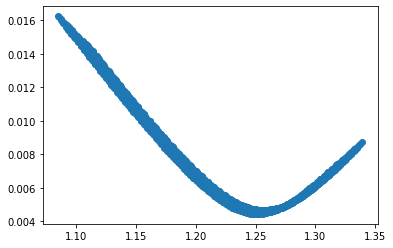

In [370]:
from matplotlib import pyplot as plt
plt.scatter(data.const,data.RMSE)
print(data[data.new_pxt<0].shape)

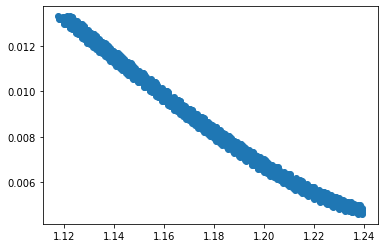

In [377]:
tempdata=data[data.RMSE<3*min(data.RMSE)]
tempdata=tempdata[(tempdata.new_pxt>0) & (tempdata.new_neh>0) & (tempdata.new_neh<118)]
tempdata["pxt_dif"]=(abs((tempdata.pxt) - (tempdata.new_pxt))) #(abs((tempdata.pxt) - (tempdata.new_pxt)))**2 + (abs((tempdata.NEH) - (tempdata.new_neh)))**2
plt.scatter(tempdata.const,tempdata.RMSE)

In [378]:
tempdata.sort_values(by=["pxt_dif"]).head(25)

,NEH,pxt,RMSE,theo_A1/A0,exp_A1/A0,theo_t_A1/A0,exp_t_A1/A0,const,new_pxt,new_neh,pxt_dif
78,24,0.0496,0.007099,0.814094,0.794509,2.067027,2.067033,1.190406,0.049605,23.997836,0.000004
421,29,0.0414,0.006557,0.814094,0.794509,2.066948,2.067033,1.200604,0.041465,28.954787,0.000065
1300,43,0.0283,0.005857,0.814094,0.794509,2.066829,2.067033,1.216898,0.028458,42.761626,0.000158
123,25,0.0477,0.006986,0.814094,0.794509,2.066732,2.067033,1.192506,0.047929,24.880670,0.000229
1453,46,0.0265,0.005787,0.814094,0.794509,2.066670,2.067033,1.218998,0.026781,45.516438,0.000282
1021,38,0.0319,0.006040,0.814094,0.794509,2.066632,2.067033,1.212199,0.032209,37.635385,0.000309
344,28,0.0428,0.006676,0.814094,0.794509,2.066482,2.067033,1.198404,0.043221,27.727630,0.000420
496,30,0.0401,0.006426,0.814094,0.794509,2.067751,2.067033,1.203003,0.039549,30.417772,0.000551
1079,39,0.0311,0.006018,0.814094,0.794509,2.066320,2.067033,1.212898,0.031651,38.321132,0.000551
899,36,0.0336,0.006156,0.814094,0.794509,2.066146,2.067033,1.209600,0.034284,35.282222,0.000684


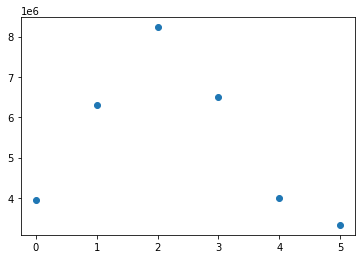

In [356]:
plt.scatter(range(0,6),[3.94E+06,6.30E+06,8.23E+06,6.51E+06,3.99E+06,3.33E+06])

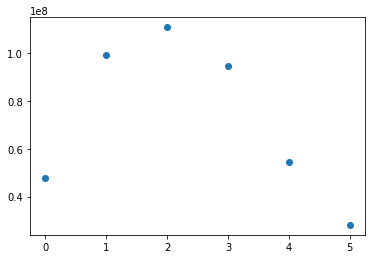

In [357]:
plt.scatter(range(0,6),[4.77E+07,9.92E+07,1.11E+08,9.49E+07,5.45E+07,2.81E+07])